Context
Machine Learning with R by Brett Lantz is a book that provides an introduction to machine learning using R. As far as I can tell, Packt Publishing does not make its datasets available online unless you buy the book and create a user account which can be a problem if you are checking the book out from the library or borrowing the book from a friend. All of these datasets are in the public domain but simply needed some cleaning up and recoding to match the format in the book.

Content
Columns

age: age of primary beneficiary

sex: insurance contractor gender, female, male

bmi: Body mass index, providing an understanding of body, weights that are relatively high or low relative to height,
objective index of body weight (kg / m ^ 2) using the ratio of height to weight, ideally 18.5 to 24.9

children: Number of children covered by health insurance / Number of dependents

smoker: Smoking

region: the beneficiary's residential area in the US, northeast, southeast, southwest, northwest.

charges: Individual medical costs billed by health insurance

In [ ]:
import pandas as pd
import numpy as np
import matplotlib .pyplot as plt
import seaborn as sns
sns.set()
%matplotlib inline

import warnings 
warnings.filterwarnings('ignore')

In [2]:
df= pd.read_csv('insurance.csv')

In [3]:
df.head()

,age,sex,bmi,children,smoker,region,charges
0,19,female,27.900,0,yes,southwest,16884.92400
1,18,male,33.770,1,no,southeast,1725.55230
2,28,male,33.000,3,no,southeast,4449.46200
3,33,male,22.705,0,no,northwest,21984.47061
4,32,male,28.880,0,no,northwest,3866.85520


In [4]:
df.shape

(1338, 7)

In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1338 entries, 0 to 1337
Data columns (total 7 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   age       1338 non-null   int64  
 1   sex       1338 non-null   object 
 2   bmi       1338 non-null   float64
 3   children  1338 non-null   int64  
 4   smoker    1338 non-null   object 
 5   region    1338 non-null   object 
 6   charges   1338 non-null   float64
dtypes: float64(2), int64(2), object(3)
memory usage: 73.3+ KB


In [6]:
df.isnull().sum()

age         0
sex         0
bmi         0
children    0
smoker      0
region      0
charges     0
dtype: int64

In [7]:
df.columns

Index(['age', 'sex', 'bmi', 'children', 'smoker', 'region', 'charges'], dtype='object')

In [9]:
df['sex'].value_counts()

sex
male      676
female    662
Name: count, dtype: int64

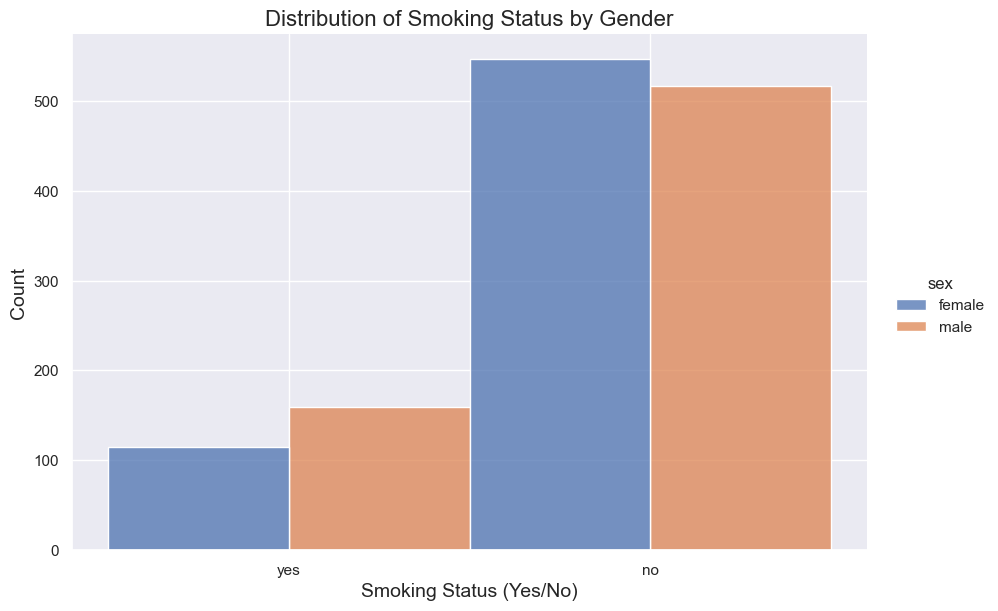

In [10]:
# Smoker Column 
# Create the displot
sns.displot(df, x="smoker", hue="sex", multiple="dodge", height=6, aspect=1.5)
plt.title("Distribution of Smoking Status by Gender", fontsize=16)
plt.xlabel("Smoking Status (Yes/No)", fontsize=14)
plt.ylabel("Count", fontsize=14)
plt.show()

In [11]:
df['smoker'].value_counts()

smoker
no     1064
yes     274
Name: count, dtype: int64

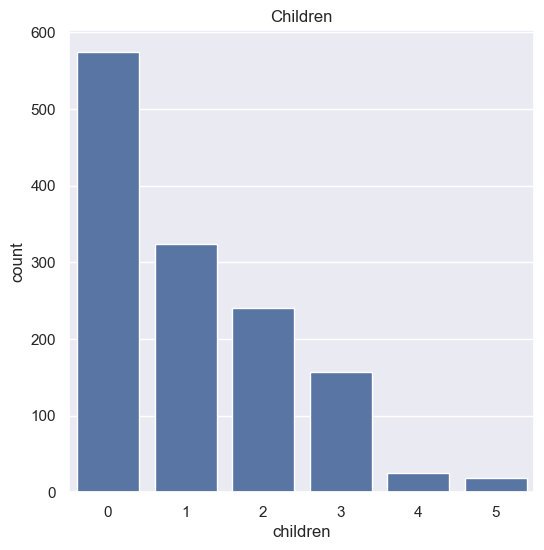

In [12]:
# Children Column 
plt.figure(figsize= (6,6))
sns.countplot(x= 'children', data= df)
plt.title('Children')
plt.show()

In [13]:
df['children'].value_counts()

children
0    574
1    324
2    240
3    157
4     25
5     18
Name: count, dtype: int64

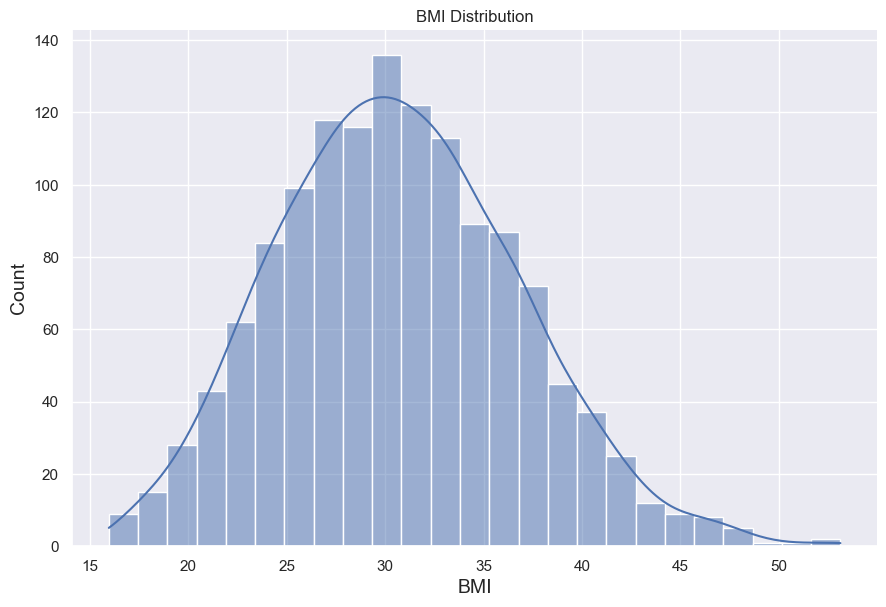

In [14]:
sns.displot(df['bmi'],kde=True,height=6, aspect=1.5,palette='set2')
plt.title('BMI Distribution')
plt.xlabel("BMI", fontsize=14)
plt.ylabel("Count", fontsize=14)
plt.show()


In [15]:
df['region'].value_counts()

region
southeast    364
southwest    325
northwest    325
northeast    324
Name: count, dtype: int64

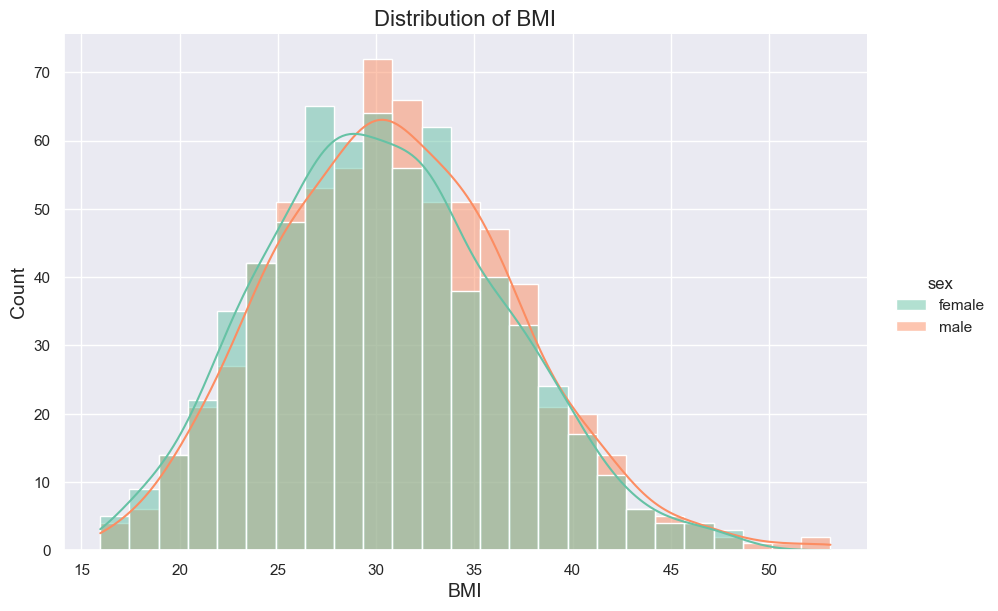

In [16]:
sns.displot(df, x="bmi", kde=True, hue="sex", height=6, aspect=1.5, palette="Set2")
plt.title("Distribution of BMI", fontsize=16)
plt.xlabel("BMI", fontsize=14)
plt.ylabel("Count", fontsize=14)
plt.show()

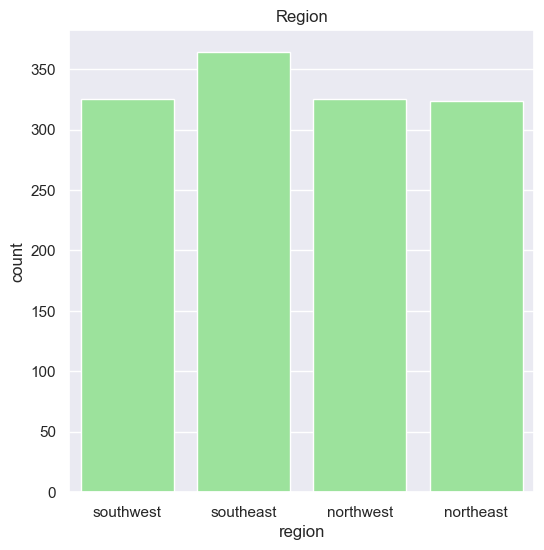

In [17]:
# Reigon Column 
plt.figure(figsize= (6,6))
sns.countplot(x= 'region', data= df,color='#90EE90')
plt.title('Region')
plt.show()

# Data Preprocessing

Convert categorical columns to numerical values.

In [18]:
df['sex']=df['sex'].map({'male':0,'female':1})
df['smoker']=df['smoker'].map({'yes':0,"no":1})
df['region']=df['region'].map({'southeast':0,'southwest':1,'northwest':2,'northeast':3})

In [19]:
df.head()

,age,sex,bmi,children,smoker,region,charges
0,19,1,27.900,0,0,1,16884.92400
1,18,0,33.770,1,1,0,1725.55230
2,28,0,33.000,3,1,0,4449.46200
3,33,0,22.705,0,1,2,21984.47061
4,32,0,28.880,0,1,2,3866.85520


In [20]:
df.describe()

,age,sex,bmi,children,smoker,region,charges
count,1338.000000,1338.000000,1338.000000,1338.000000,1338.000000,1338.000000,1338.000000
mean,39.207025,0.494768,30.663397,1.094918,0.795217,1.455157,13270.422265
std,14.049960,0.500160,6.098187,1.205493,0.403694,1.130197,12110.011237
min,18.000000,0.000000,15.960000,0.000000,0.000000,0.000000,1121.873900
25%,27.000000,0.000000,26.296250,0.000000,1.000000,0.000000,4740.287150
50%,39.000000,0.000000,30.400000,1.000000,1.000000,1.000000,9382.033000
75%,51.000000,1.000000,34.693750,2.000000,1.000000,2.000000,16639.912515
max,64.000000,1.000000,53.130000,5.000000,1.000000,3.000000,63770.428010


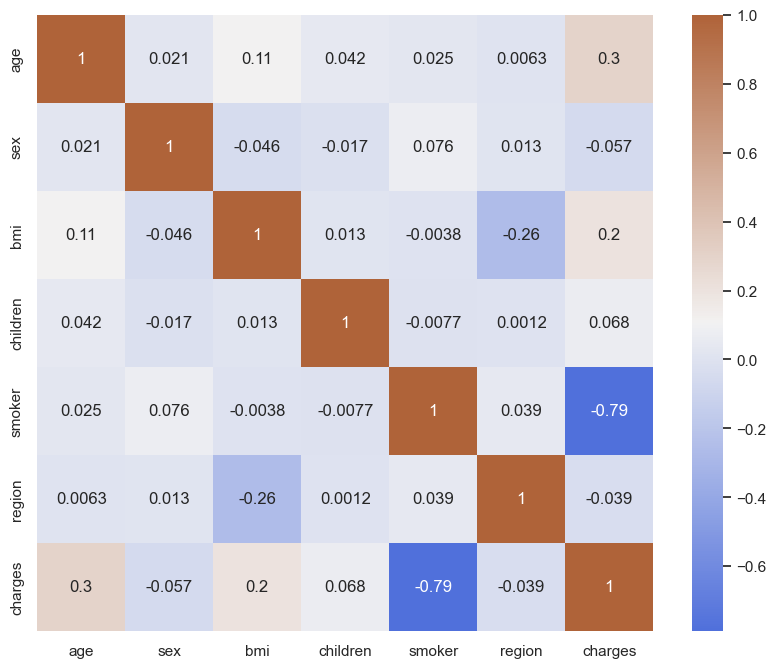

In [21]:
fig, ax = plt.subplots(figsize=(10, 8))
corr = df.corr()

# Plot the heatmap with annotations
sns.heatmap(corr, cmap=sns.diverging_palette(260, 30, as_cmap=True), square=True, ax=ax, annot=True)
plt.show()

Features = age, sex, bmi, children, smoker, region

Target variable = charges

In [22]:
#Spliting Features and Traget
x=df.drop('charges',axis=1)
y=df['charges']

In [23]:
x ##Features

,age,sex,bmi,children,smoker,region
0,19,1,27.900,0,0,1
1,18,0,33.770,1,1,0
2,28,0,33.000,3,1,0
3,33,0,22.705,0,1,2
4,32,0,28.880,0,1,2
...,...,...,...,...,...,...
1333,50,0,30.970,3,1,2
1334,18,1,31.920,0,1,3
1335,18,1,36.850,0,1,0
1336,21,1,25.800,0,1,1


In [24]:
y ##target

0       16884.92400
1        1725.55230
2        4449.46200
3       21984.47061
4        3866.85520
           ...     
1333    10600.54830
1334     2205.98080
1335     1629.83350
1336     2007.94500
1337    29141.36030
Name: charges, Length: 1338, dtype: float64

Spliting the Data Into Training Data and Testing data

In [25]:
from sklearn.model_selection import train_test_split
x_train,x_test,y_train,y_test=train_test_split(x, y, test_size=0.2,random_state=1)

In [26]:
print(x.shape)
print(x_train.shape)
print(x_test.shape)

(1338, 6)
(1070, 6)
(268, 6)


In [27]:
print(y.shape)
print(y_test.shape)
print(y_train.shape)

(1338,)
(268,)
(1070,)


Do standarization of training and test dataset

<Axes: >

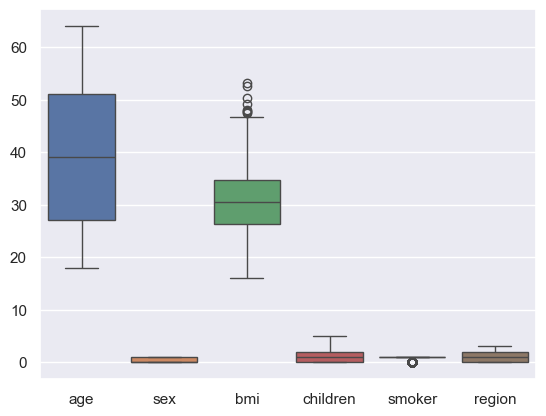

In [28]:
sns.boxplot(data= x_train)

In [29]:
## standardize the Data Only for Train independent Feature 
from sklearn.preprocessing import StandardScaler
scaler=StandardScaler()
x_train=scaler.fit_transform(x_train)
x_test= scaler.transform(x_test)

<Axes: >

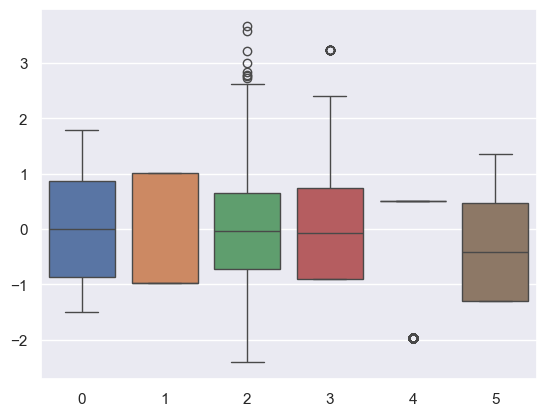

In [30]:
sns.boxplot(data= x_train)

In [ ]:
x_train #Standardized

array([[ 1.00228629,  1.01886959, -0.66474472, -0.90705771,  0.50874702,
         0.47062435],
       [ 1.00228629, -0.98147988, -1.51402369, -0.07894188,  0.50874702,
        -0.41750273],
       [-1.50426607, -0.98147988,  1.08117685, -0.90705771,  0.50874702,
        -1.3056298 ],
       ...,
       [ 0.85905473,  1.01886959,  0.70063454,  0.74917395, -1.96561348,
         1.35875142],
       [ 0.07128113,  1.01886959, -1.38009893,  0.74917395, -1.96561348,
        -1.3056298 ],
       [ 1.28874942, -0.98147988, -0.44589206, -0.07894188,  0.50874702,
        -1.3056298 ]])

In [ ]:
x_test #Standardized

array([[-1.43265029, -0.98147988,  0.79372858, -0.90705771,  0.50874702,
         0.47062435],
       [ 1.28874942, -0.98147988,  0.1420703 , -0.90705771,  0.50874702,
         0.47062435],
       [ 0.85905473, -0.98147988,  1.03381321, -0.90705771,  0.50874702,
        -0.41750273],
       ...,
       [ 0.5725916 , -0.98147988,  1.35065959,  0.74917395, -1.96561348,
        -1.3056298 ],
       [-1.43265029,  1.01886959,  0.96440099, -0.90705771,  0.50874702,
         0.47062435],
       [-0.28679778,  1.01886959, -0.74232309, -0.90705771,  0.50874702,
         1.35875142]])

In [46]:
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_absolute_error,mean_squared_error
from sklearn.metrics import r2_score
regression=LinearRegression()
regression.fit(x_train,y_train)

LinearRegression()

In [47]:
regression.coef_

array([ 3592.75396568,   119.98986371,  1976.09523493,   489.48920639,
       -9616.37917194,   407.82345973])

In [48]:
regression.intercept_

np.float64(13230.161574933647)

Mean Abslute Error  4047.367120287264
R2 Score 0.7621302054070109


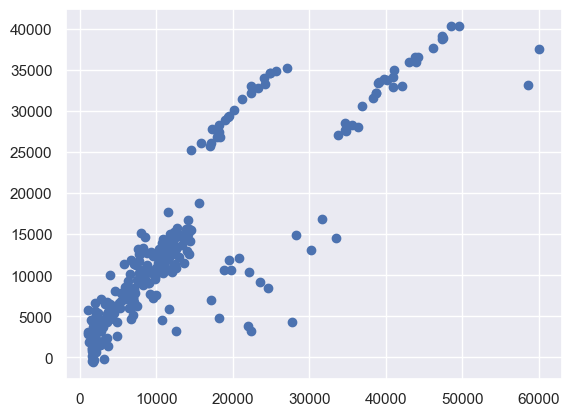

In [50]:
y_pred= regression.predict(x_test)
mae= mean_absolute_error(y_test,y_pred)
score=r2_score(y_test,y_pred)
print("Mean Abslute Error ",mae)
print("R2 Score",score)
plt.scatter(y_test,y_pred)

# Lasso Regression and Lasso Cross Validataion 

Mean Abslute Error  4047.3764273450142
R2 Score 0.7621187326324537


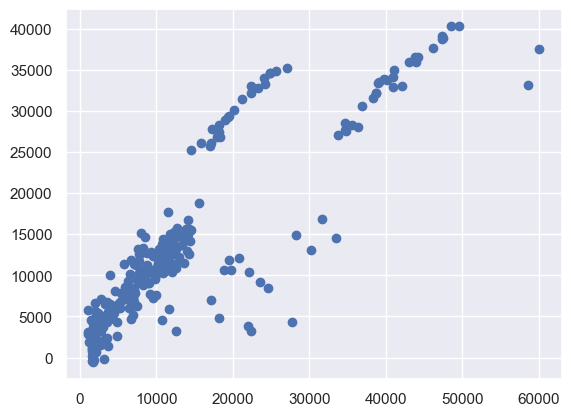

In [35]:
from sklearn.linear_model import Lasso
from sklearn.metrics import mean_absolute_error
from sklearn.metrics import r2_score
lasso=Lasso()
lasso.fit(x_train,y_train)
y_pred=lasso.predict(x_test)
mae=mean_absolute_error(y_test,y_pred)
score=r2_score(y_test,y_pred)
print("Mean Abslute Error ",mae)
print("R2 Score",score)
plt.scatter(y_test,y_pred )


In [36]:
from sklearn.linear_model import LassoCV
lassocv=LassoCV(cv=5)
lassocv.fit(x_train,y_train)
lassocv.predict(x_test)

array([ 4410.09414003, 12885.94916226, 12745.95252398, 13172.93083011,
         727.31020877, 32083.85771555, 12839.81753301, 12253.55819601,
        3767.93161368, 29387.04291168, 10924.86234056, 17639.37430011,
        8614.61467484,  8485.23193825,  3099.30100197, 10589.47929186,
        3891.30082406,  7065.68733897, 14910.46229806, 14569.37407677,
       12501.38131028, 32838.37953708,  9061.49435222,  9154.01659106,
        2985.58978227,  8170.23240519,  9493.61378839, 10666.30689711,
        7822.64679544,  4355.30117421, 14260.05210751,  5969.1563734 ,
       34522.73609534, 27019.47135618, 33226.21270225,  9543.65417563,
       30576.69996044, 26776.36326074, 15067.89127971, 33852.56957151,
        6220.45368106, 14056.64780532, 10607.54809214, 15228.99949276,
        4326.75225851, 13062.32544911,  4292.15912462, 28551.69131215,
        7237.58084978, 14160.02915965, 13221.14814775, 12444.30337978,
        1885.4649451 ,  8991.51650598, 26048.24511503, 10051.11463506,
      

Mean Abslute Error  4047.46236732728
R2 Score 0.7620172818825414


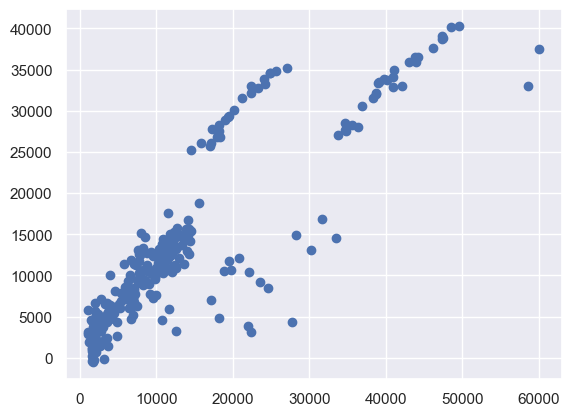

In [37]:
y_pred=lassocv.predict(x_test)
mae=mean_absolute_error(y_test,y_pred)
score=r2_score(y_test,y_pred)
print("Mean Abslute Error ",mae)
print("R2 Score",score)
plt.scatter(y_test,y_pred)

# Ridge Regression and Cross Validation

Mean Abslute Error  4048.6928018214176
R2 Score 0.7620972282894605


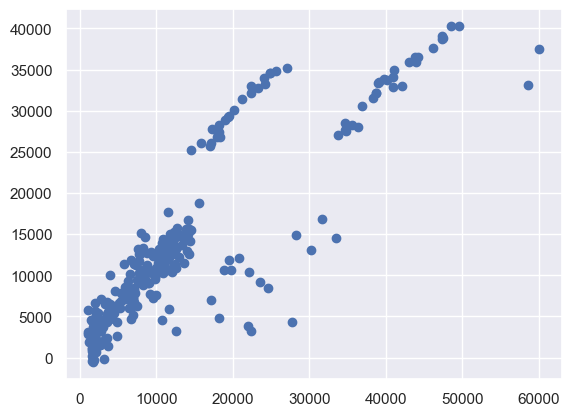

In [38]:
from sklearn.linear_model import Ridge
from sklearn.metrics import mean_absolute_error
from sklearn.metrics import r2_score
ridge=Ridge()
ridge.fit(x_train,y_train)
y_pred=ridge.predict(x_test)
mae=mean_absolute_error(y_test,y_pred)
score=r2_score(y_test,y_pred)
print("Mean Abslute Error ",mae)
print("R2 Score",score)
plt.scatter(y_test,y_pred)

Mean Abslute Error  4048.6928018214176
R2 Score 0.7620972282894605


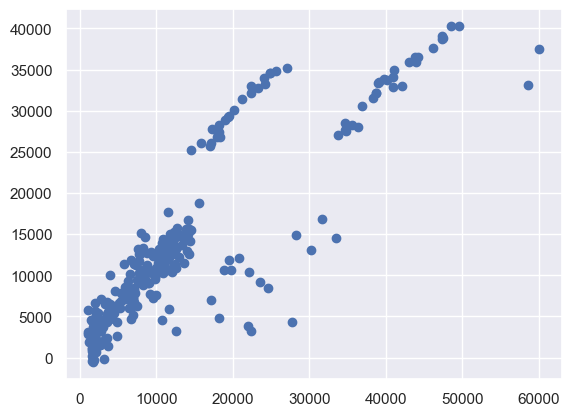

In [ ]:
#Ridge Cross Cross Validataion 
from sklearn.linear_model import RidgeCV
ridgecv=RidgeCV(cv=5)
ridgecv.fit(x_train,y_train)
y_pred=ridgecv.predict(x_test)
mae=mean_absolute_error(y_test,y_pred)
score=r2_score(y_test,y_pred)
print("Mean Abslute Error ",mae)
print("R2 Score",score)
plt.scatter(y_test,y_pred)

## Elasticnet Regression and Cross Validataion 

Mean Abslute Error  4988.022470666648
R2 Score 0.6691637007484571


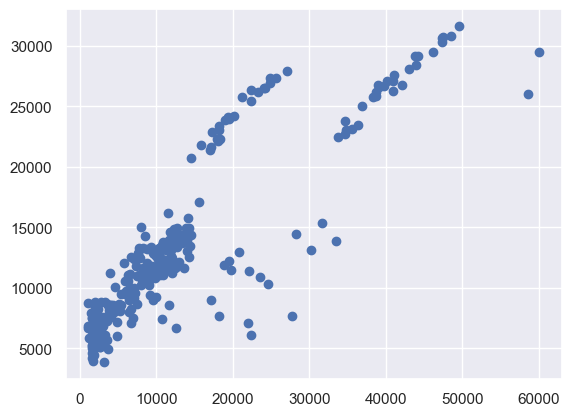

In [40]:
from sklearn.linear_model import ElasticNet
from sklearn.metrics import mean_absolute_error
from sklearn.metrics import r2_score
elasticnet=ElasticNet()
elasticnet.fit(x_train,y_train)
y_pred=elasticnet.predict(x_test)
mae=mean_absolute_error(y_test,y_pred)
score=r2_score(y_test,y_pred)
print("Mean Abslute Error ",mae)
print("R2 Score",score)
plt.scatter(y_test,y_pred)

Mean Abslute Error  8240.980139165742
R2 Score 0.13530277177573824


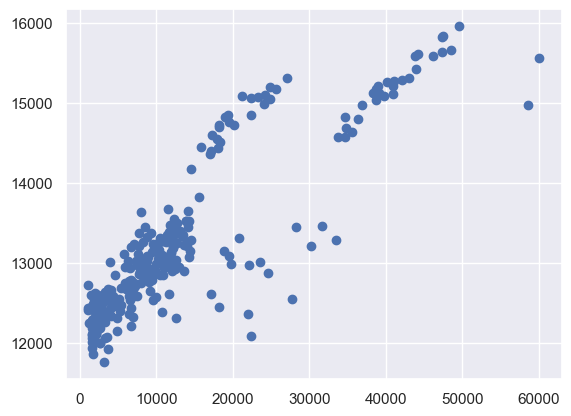

In [ ]:
#Cross Validataion 
from sklearn.linear_model import ElasticNetCV
elasticnetcv=ElasticNetCV(cv=5)
elasticnetcv.fit(x_train,y_train)
y_pred=elasticnetcv.predict(x_test)
mae=mean_absolute_error(y_test,y_pred)
score=r2_score(y_test,y_pred)
print("Mean Abslute Error ",mae)
print("R2 Score",score)
plt.scatter(y_test,y_pred)